<h2>**Problem Definition**</h2>
<p><i>
    Chest pain can be an early indicator of a fatal heart disease, which can be restricted from progression if diagnosed in early stages. Intuition-based analysis of a patients diagnostic reports and health records in order to decide of it is due to a heart desiese or due to some other minor circumstances, has been the traditional way of approaching such cases of chest pain. There is a significant room for enhancing the accuracy, efficiency and reliablity of this process using a data-driven approach, which goes in-hand with the domain experts (Cardiologists).</i> 

In [2]:
!pip install bubbly
!pip install pandas-profiling
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# for some cool Stats
import statsmodels.api as sm 
from statsmodels.api import add_constant

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot


  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=44e13a2a09552bf8acea0b6c03872da0ab3c165f6ec7bb2c064ed0c6acd543bd
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

# import heart  data
path= "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/heart.csv"
df_heart = pd.read_csv(path)

In [5]:
print(df_heart.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [0]:
df=df_heart.rename(columns={'cp':'pain_type', 'trestbps': 'rest_bp', 'fbs':'fast_bp', 'restecg':'test_ecg', 'thalach':'max_hr',
       'exang ':'ex_angina', 'oldpeak':'st_depression', 'ca':'number_vessels', 'target':'heart_des'})


<b>Checking a sample of the data</b>

In [7]:
df.sample(10)

,age,sex,pain_type,rest_bp,chol,fast_bp,test_ecg,max_hr,exang,st_depression,slope,number_vessels,thal,heart_des
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


<h1><b>Data Cleaning for  any missing (NaN) values</b></h1>

In [8]:
df.isnull().sum()

age               0
sex               0
pain_type         0
rest_bp           0
chol              0
fast_bp           0
test_ecg          0
max_hr            0
exang             0
st_depression     0
slope             0
number_vessels    0
thal              0
heart_des         0
dtype: int64

<h1><b>Checking for the data-types and the shape of the dataset</b></h1>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
pain_type         303 non-null int64
rest_bp           303 non-null int64
chol              303 non-null int64
fast_bp           303 non-null int64
test_ecg          303 non-null int64
max_hr            303 non-null int64
exang             303 non-null int64
st_depression     303 non-null float64
slope             303 non-null int64
number_vessels    303 non-null int64
thal              303 non-null int64
heart_des         303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


** <i>We have 302 rows and 14 columns. Attributes are either integers or floats</i>**

<h1><b>CHECK POINT 1 : Exploratory Data Analysis</b></h1>


<h2><b>Questions and Solutions</b></h2>


<b>1. How many people are suffering from heart disease? Also plot the stats. </b>


The number of patients suffering from heart desiese is: 165 out of 303 which is 54.46 % of the total sample.



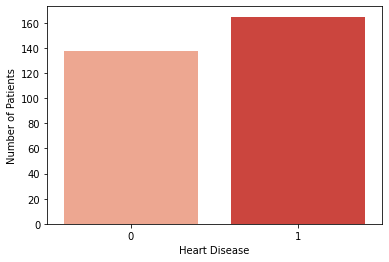

In [10]:
print('')
print('The number of patients suffering from heart desiese is:', df.heart_des.value_counts()[1],'out of',len(df.heart_des),'which is',np.round((df.heart_des.value_counts()[1]/len(df.heart_des))*100,decimals=2),'% of the total sample.')
print('')
sns.countplot(df.heart_des,palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.show()

<b>2. What is the split up by gender for the patients </b>

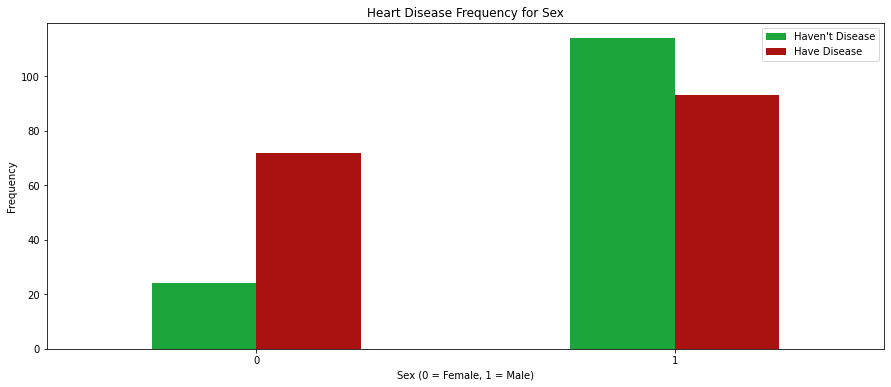

In [11]:
# Easier way to show Gender-wise Diseased and No-Disease population
pd.crosstab(df.sex,df.heart_des).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

<b>3. Visualize frequency distribution of the thalach (max heart rate) variable and find what's the heart rate and heart disease relation?   </b>

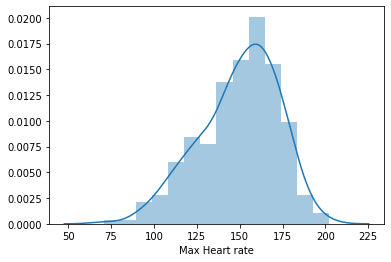

In [12]:
sns.distplot(df.max_hr)
plt.xlabel('Max Heart rate')
plt.show()

* $H_o:$ Data IS Normal
* $H_a:$Data IS NOT Normal

In [0]:
import scipy.stats as stats
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [14]:
t,p=stats.shapiro(df.max_hr)
print('Since the p-value,',np.round(p,decimals=4),'is less than 0.05, we reject the Null Hypothesis. This implies data deviation from being normal.')

Since the p-value, 0.0001 is less than 0.05, we reject the Null Hypothesis. This implies data deviation from being normal.


In [15]:
print('The data is left-skewed with a Kurtosis of:',np.round(df.max_hr.kurtosis(),decimals=4))

The data is left-skewed with a Kurtosis of: -0.062


In [16]:
print("The pearson's correlation between heart desease and max heart rate is", np.round(df.heart_des.corr(other=df.max_hr),decimals=4))

The pearson's correlation between heart desease and max heart rate is 0.4217


<i>Since the heart desease and max heart rate are positively correlated, chances of Heart Disease increase with increase in heart rate.</i>

<b><i>Hypothesis test of mean heart rate of patients with and without heart Disease</i></b>
<p>
 <li>$H_0:\mu_{HeartRateOfHeart Disease}=\mu_{HeartRateOfNo Heart Disease}$
 <li>$H_0:\mu_{HeartRateOfHeart Disease}!=\mu_{HeartRateOfNo Heart Disease}$
     
<i>Forming two groups and testing for normality of both the groups.</i>
</p>

In [17]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.max_hr)
t2,p2=stats.shapiro(g2.max_hr)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.4253
The p-value for shapiro test of group 1 : 0.0004


<i>Since for both the groups the p-value is less than 0.05, we reject the null and state that <b>Both the groups are NOT normal</b>.</i>

<i>Now we perform <b>Mannwhitneyu Test</b> to find if the mean of both the group are the same or NOT</i>

In [18]:
t,p=stats.mannwhitneyu(g1.chol,g2.chol)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=4))

The p-value for Mannwhitneyu test : 0.0179


<i>Since the p-value is less than 0.05, we reject the null and state that <b>The mean heart rates of both the groups is NOT the same</b>.</i>

<i>Now we perform <b>post-hoc analysis</b> to analyse the mean heart rates of both the groups</i>

In [19]:
print('The mean heart rate of patients without a heart disease:',np.round(g1.max_hr.mean(),decimals=2))
print('The mean heart rate of patients with a heart disease:',np.round(g2.max_hr.mean(),decimals=2))

The mean heart rate of patients without a heart disease: 139.1
The mean heart rate of patients with a heart disease: 158.47


In [20]:
X=df.max_hr
Y=df.heart_des
import statsmodels.api as sm 
from statsmodels.api import add_constant

XC=sm.add_constant(X,has_constant = 'add')
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                  0.1398
Time:                        19:57:51   Log-Likelihood:                -179.63
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.160e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3915      0.987     -6.475      0.000      -8.326      -4.457
max_hr         0.0440      0.

<i>Conclusion : With a unit increase in max heart rate, there is a <b>*4.4 %*</b> increase in probablity of a heart disease.</i>

<b>4. Find correlation matrix for all the variables with target. </b>

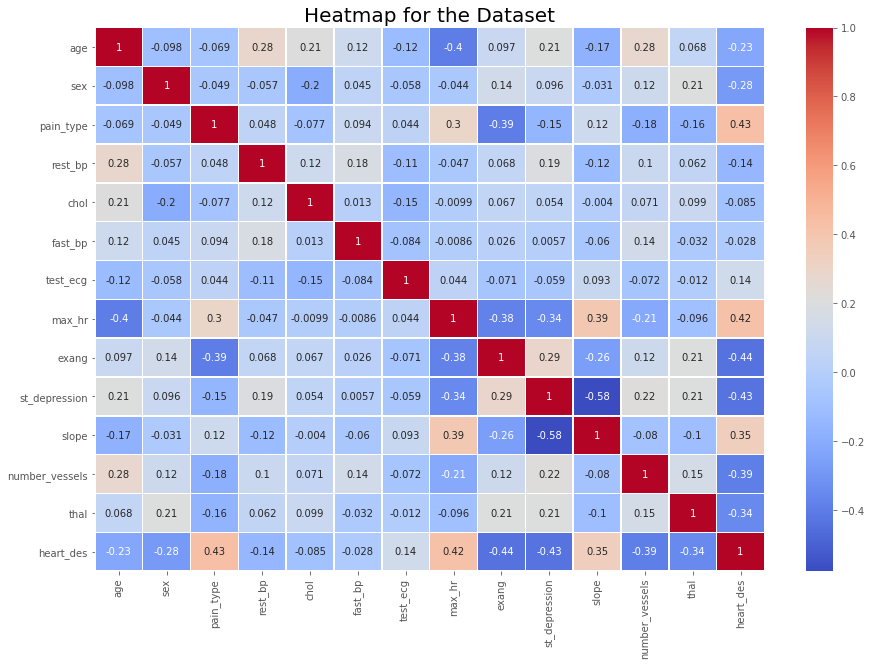

In [21]:
# making a heat map across all variables

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

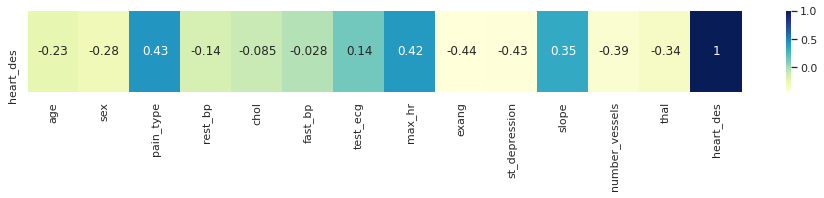

In [22]:
# Correlation with only target variables
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df.corr()).heart_des).T,annot=True, cmap='YlGnBu')
plt.show()

<b>5. Find Mean,Min & Max of age and plot its distribution. </b>

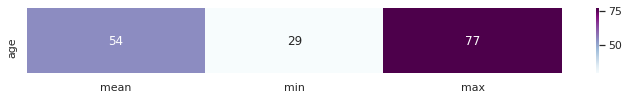

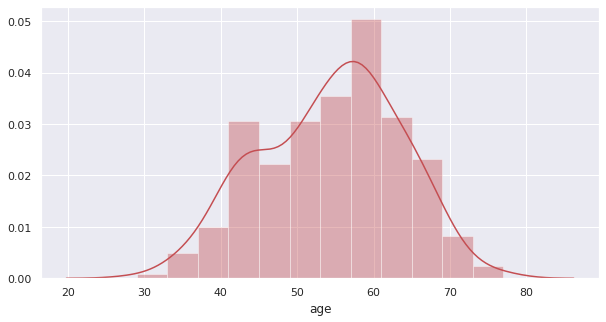

In [23]:
sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df.age.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()
print('')
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.age, color='r')
plt.show()

<b>6. Age and its relation to heart disease. Is a particular set age of population(say age group 40-50) prone to heart disease than the rest of population age (50+)?  </b>

In [24]:
print("The pearson's correlation between heart disease and age is", np.round(df.heart_des.corr(other=df.age),decimals=4))

The pearson's correlation between heart disease and age is -0.2254


<i>Since the age and max heart rate are negatively correlated, chances of Heart disease decrease with increase in age.</i>

<b><i>Hypothesis test of mean age of patients with and without heart disease</i></b>
<p>
 <li>$H_0:\mu_{AgeOfHeart disease}=\mu_{AgeOfNo Heart disease}$
 <li>$H_0:\mu_{AgeOfHeart disease}!=\mu_{AgeOfNo Heart disease}$
     
<i>Forming two groups and testing for normality of both the groups.</i>
</p>

In [25]:
g1=df[df.heart_des==0]
g2=df[df.heart_des==1]
t1,p1=stats.shapiro(g1.age)
t2,p2=stats.shapiro(g2.age)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.0029
The p-value for shapiro test of group 1 : 0.1211


<i>Since for only the first group the p-value is less than 0.05, we reject the null and state that <b>One of the groups are NOT normal</b>.</i>

<i>Now we perform <b>Mannwhitneyu Test</b> to find if the mean of both the group are the same or NOT</i>

In [26]:
t,p=stats.mannwhitneyu(g1.age,g2.age)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=10))

The p-value for Mannwhitneyu test : 1.71926e-05


<i>Since the p-value is less than 0.05, we reject the null and state that <b>The mean age of both the groups is NOT the same</b>.</i>

<i>Now we perform <b>post-hoc analysis</b> to analyse the mean age of both the groups</i>

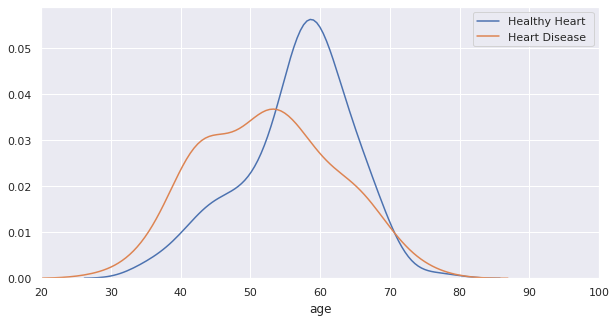

In [27]:
df_age_target = df[df.heart_des == 1]
df_age_target = df_age_target[['age','heart_des']]


df_age_target_0 = df[df.heart_des == 0]
df_age_target_0 = df_age_target_0[['age','heart_des']]

fig, ax = plt.subplots()
sns.distplot(df_age_target_0.age, hist = False, kde = True, label='Healthy Heart ')
sns.distplot(df_age_target.age, hist = False, kde = True, label='Heart Disease')

ax.set_xlim(20,100)
plt.show()

In [28]:
import numpy as np
print('The mean age of patients without a heart desiese:',np.round(df.age.mean(),decimals=2))
print('The mean age of patients with a heart desiese:',np.round(df.age.mean(),decimals=2))

The mean age of patients without a heart desiese: 54.37
The mean age of patients with a heart desiese: 54.37


<i>Now, we interpret the model coefficients</i>

In [29]:
X=df.age
Y=df.heart_des
XC=sm.add_constant(X)
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.03778
Time:                        19:58:03   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

<i>So, we can conclude that with an unit increase in age from minimum age (29),there is a <b>5.2 %</b> decrease in probablity of a heart disease.</i>
<i>Hence, younger population groups say (age group 40-50) are slightly more prone to heart diseases than it's elder group (age group say 50-60) </i>

<b>7. Plot chest pain type pie chart.</b>

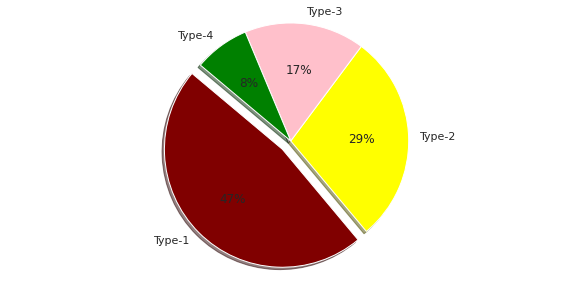

In [30]:
labels = 'Type-1', 'Type-2', 'Type-3', 'Type-4'
counts = list(df.pain_type.value_counts().values)
colors = ['maroon', 'yellow', 'pink', 'green']
explode = (0.1, 0, 0, 0)  # explode 1st slice
plt.pie(counts, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<b>People suffer Type-1 Chest pain more than other types </b>

<b>8. What is the max heart rate achieved in non heart disease patients? 
</b>

In [31]:
print('The max heart rate achieved in non heart disease patients is :',max(df[df.heart_des==0].max_hr),'bpm')

The max heart rate achieved in non heart disease patients is : 195 bpm


<h1><b>CHECK POINT 2 : Testing various ML Models </b></h1>


<h2><b>Implement different MLs and decide which model fits best</b></h2>


In [32]:
#Creating data frame without target variable
df.head(5)


,age,sex,pain_type,rest_bp,chol,fast_bp,test_ecg,max_hr,exang,st_depression,slope,number_vessels,thal,heart_des
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
y_target = df['heart_des']
var_data = df.drop('heart_des', axis = 1)

In [34]:
# Categorical variables need : ONE HOT ENCODING 
var_data = pd.get_dummies(var_data, drop_first=True)
print(var_data.head())

   age  sex  pain_type  rest_bp  chol  fast_bp  test_ecg  max_hr  exang  \
0   63    1          3      145   233        1         0     150      0   
1   37    1          2      130   250        0         1     187      0   
2   41    0          1      130   204        0         0     172      0   
3   56    1          1      120   236        0         1     178      0   
4   57    0          0      120   354        0         1     163      1   

   st_depression  slope  number_vessels  thal  
0            2.3      0               0     1  
1            3.5      0               0     2  
2            1.4      2               0     2  
3            0.8      2               0     2  
4            0.6      2               0     2  


In [35]:
# Train and Test datasets

from sklearn.model_selection import train_test_split
x = var_data
y = y_target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (227, 13)
Shape of x_test : (76, 13)
Shape of y_train : (227,)
Shape of y_test : (76,)


## MODEL 1 : SVM

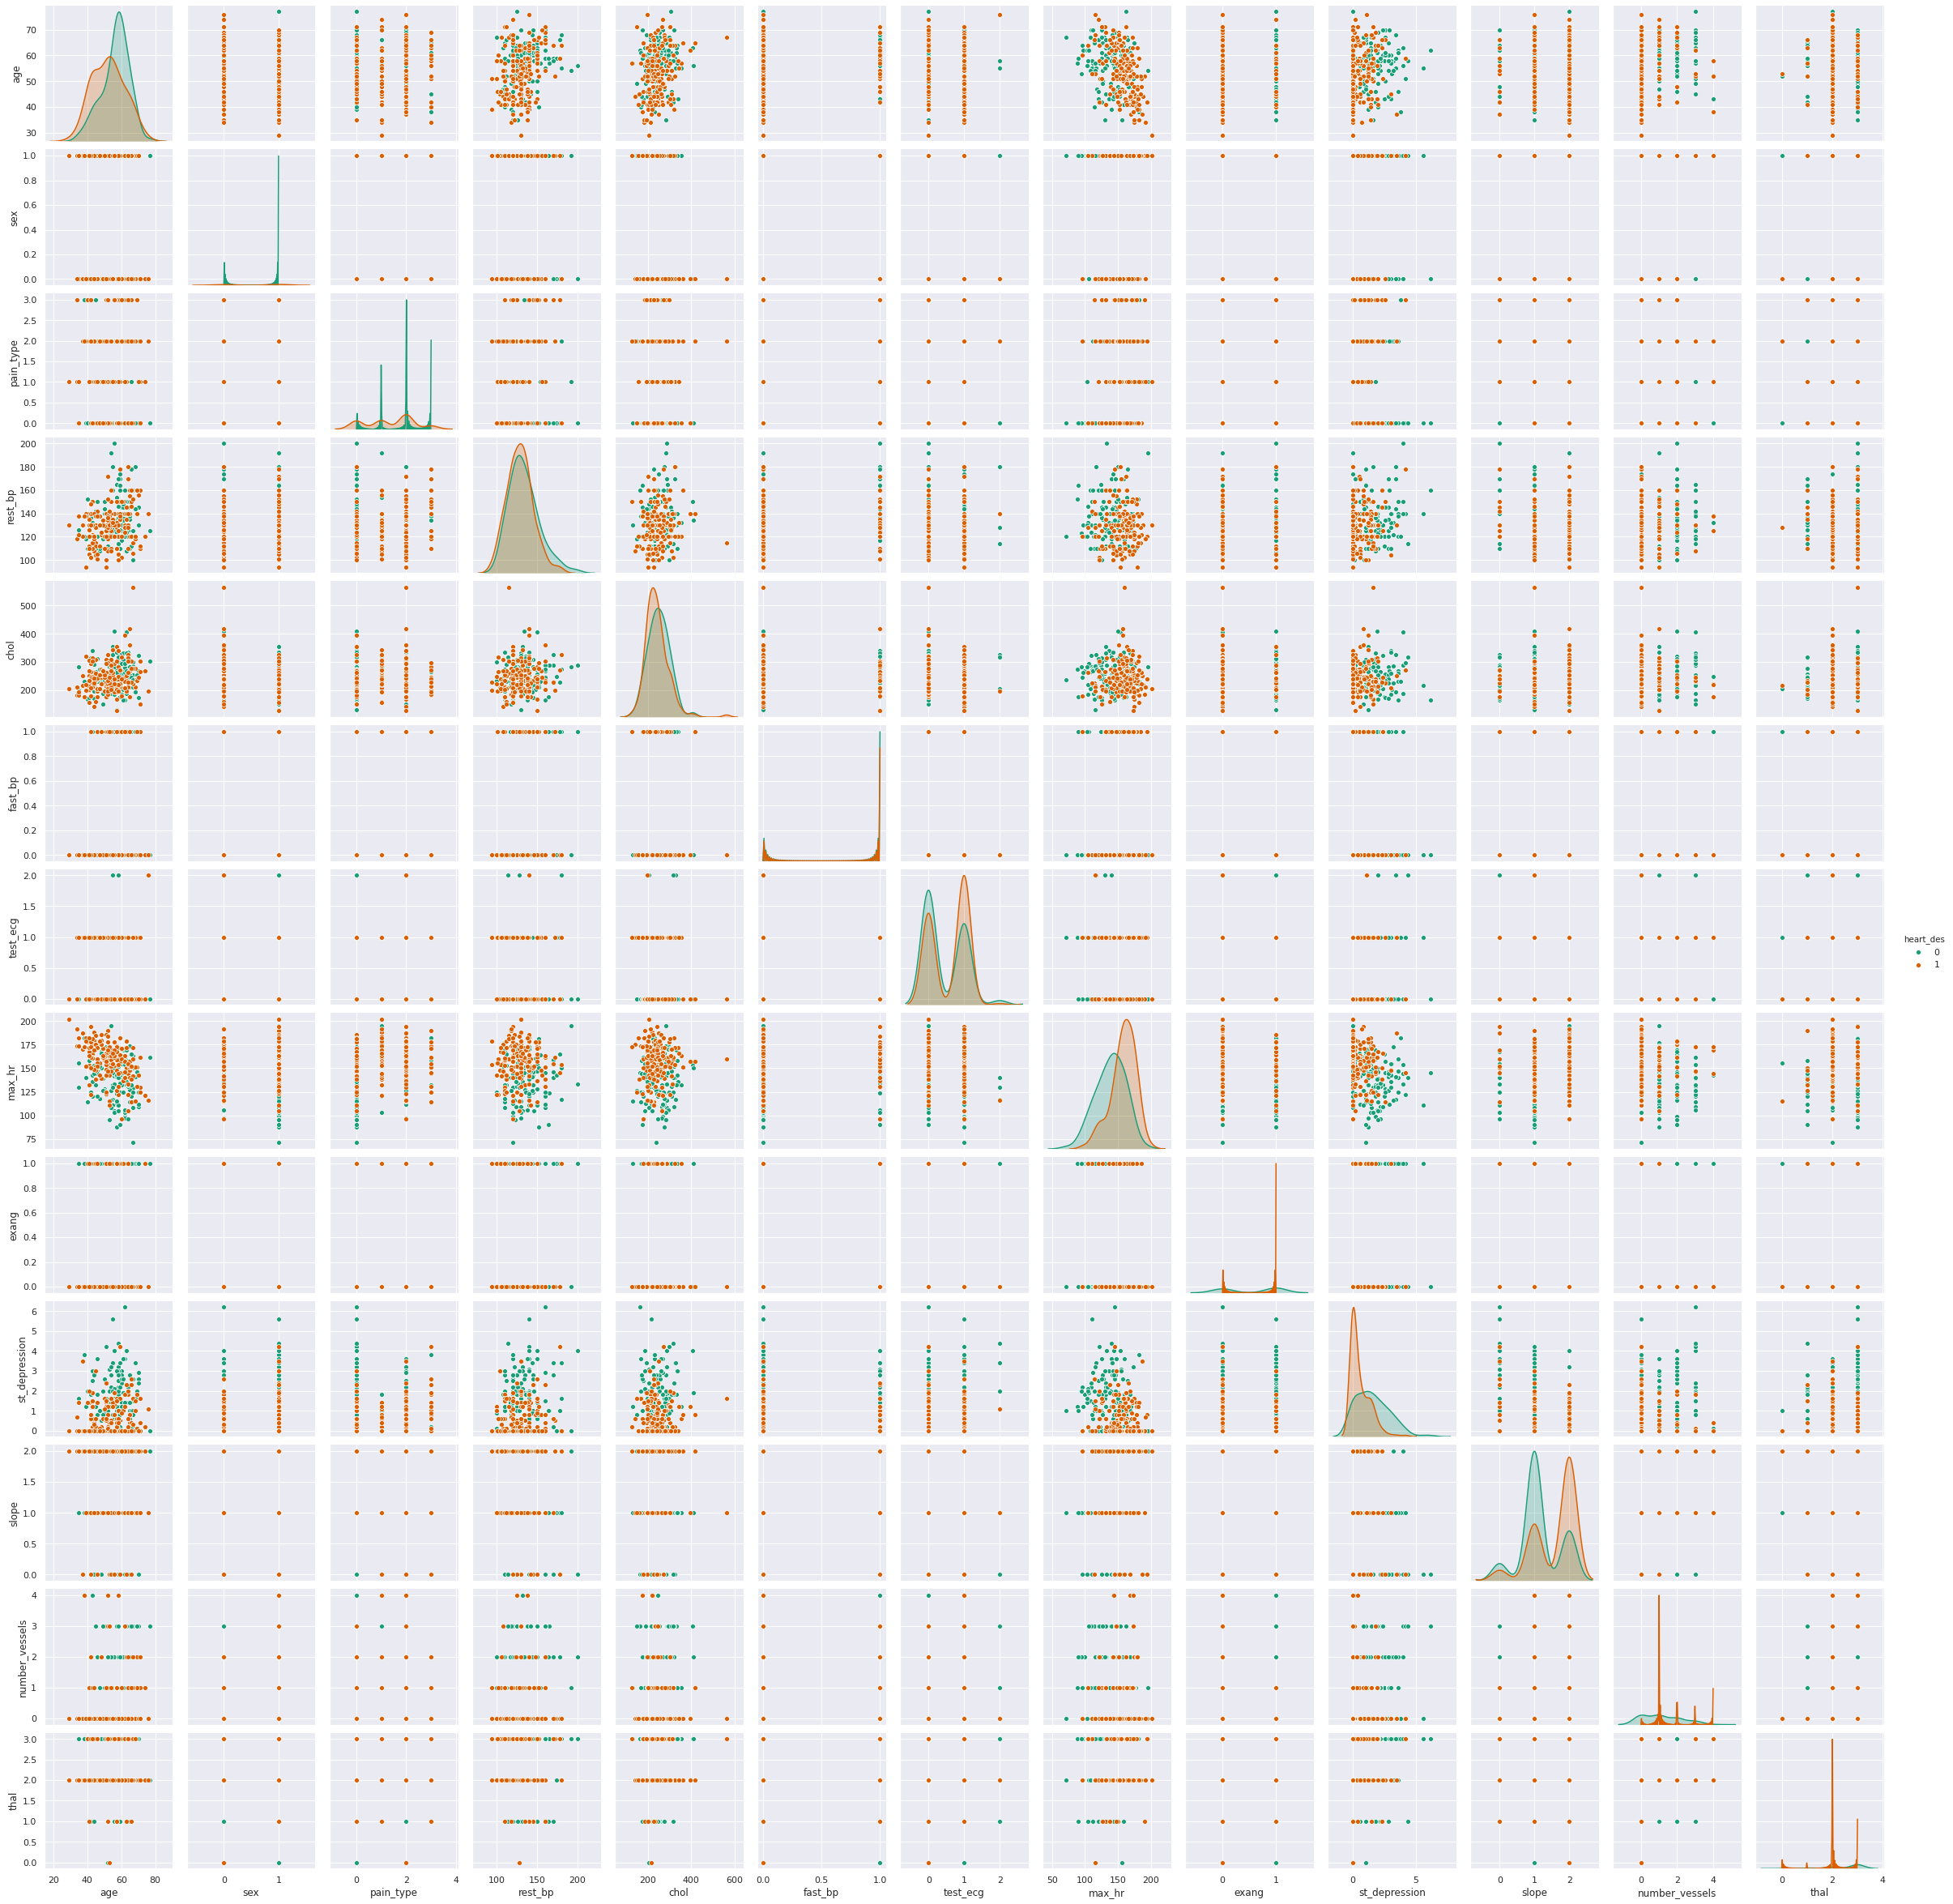

In [36]:
# Before we implement the SVM - we want to understand if we can find any pattern between target variable and other features 
sns.pairplot(df,hue='heart_des',palette='Dark2')

In [37]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



In [0]:
# Let's implement Gridsearch to see if model improves
from sklearn.model_selection import learning_curve,GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [41]:
grid = GridSearchCV(SVC(),param_grid, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [42]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



<b>Conclusion The Model remained the same and not much change after GridSearch hence we can keep any of them</b>

## MODEL 2 : DECISION TREE 

In [43]:
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 18
Accuracy: 0.76


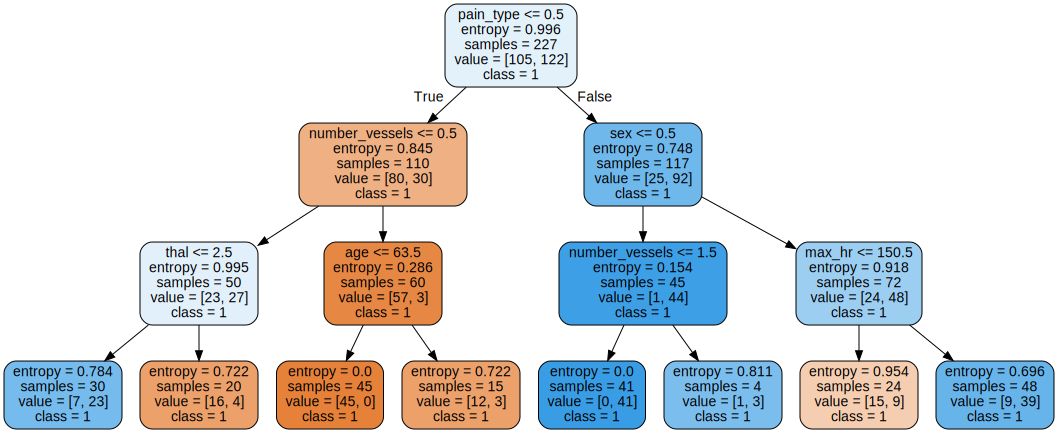

In [45]:
import graphviz

# Feature names will be all x columns 
feature_names = x.columns

# Class names will be our target variable
y_train_str = y_train.astype('str')

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=y_train_str)
graph = graphviz.Source(dot_data)  
graph

## MODEL 3 :  Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 6,random_state=123)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9779735682819384
Testing Accuracy : 0.8552631578947368


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



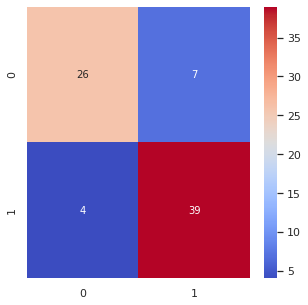

In [47]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

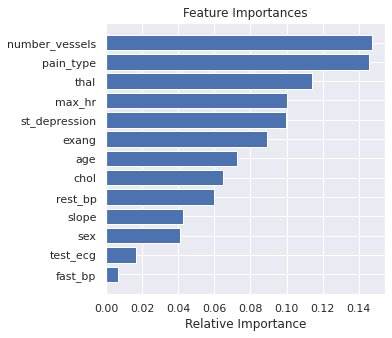

In [48]:
features = x.columns

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# We can see Random Forest has highest accuracy - 
<b> Checkpoint : Random Forest has best accuracy - Let us now work on Model Deployment. </b>

# USER BASED INPUT to Predict if the user can have heart disease 
 <b> All Jupyter notebooks have user based forms using Widgets which can serve as an input from the user. For future references, once you decide which model works best - you can always think on ideas how to get user input, use your best model and predict if the user gets the correct output to encourage user-based interactions
 

<b>Using Jupyter Widgets on Google Collab</b>

In [0]:

User_Age =   37#@param {type:"integer"}

Male =  False#@param {type:"boolean"}         
Female = True#@param {type:"boolean"}

if Male:
  sex = 1
else:
  sex = 0 #female

Chest_pain_type = 1 #@param {type:"slider", min:0, max:3, step:1}
resting_bp = 127 #@param {type:"slider", min:94, max:200, step:1}
Serum_cholestoral = 329 #@param {type:"slider", min:125, max:500, step:1}

# fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
fasting_blood_sugar = 0 #@param {type:"slider", min:0, max:1, step:1}

#restecg: resting electrocardiographic results
#-- Value 0: normal # Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

resting_electrocardiographic = 1 #@param {type:"slider", min:0, max:2, step:1}
max_heart_rate = 162 #@param {type:"slider", min:70, max:210, step:1}

#exercise induced angina (1 = yes; 0 = no) 
exercise_angina =  0 #@param {type:"slider", min:0, max:1, step:1}

# oldpeak = ST depression induced by exercise relative to rest 
oldpeak = 1.6 #@param {type:"slider", min:0, max:6.5, step:0.1}

#slope: the slope of the peak exercise ST segment  #Value 1: upsloping   # Value 2: flat  #Value 3: downsloping 
slope =  1 #@param {type:"slider", min:1, max:3, step:1}

#ca: number of major vessels (0-3) colored by flourosopy 
no_major_vessels =  1 #@param {type:"slider", min:0, max:4, step:1}

#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect, 3 = permanent defect
thal =  3 #@param {type:"slider", min:0, max:3, step:1}


In [50]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click for Results!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    new_input = [[User_Age,sex,Chest_pain_type,resting_bp,Serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_angina,oldpeak,slope,no_major_vessels,thal]]
    #print(new_input)
    new_output = model.predict(new_input)
    if new_output == 0:
      print("You have Healthy Heart :) ")
    else:
      print("Likely to have Heart disease :( ")
    #print(new_output)
    #print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Click for Results!', style=ButtonStyle())

Output()

In [51]:
# You can achieve same results by passing a list with the following values
new_input = [[User_Age,sex,Chest_pain_type,resting_bp,Serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_angina,oldpeak,slope,no_major_vessels,thal]]
print(new_input)
new_output = model.predict(new_input)
print(new_output)

[[37, 0, 1, 127, 329, 0, 1, 162, 0, 1.6, 1, 1, 3]]
[1]


# Web based Model Predictions based on user inputs

In [56]:
from flask import Flask
import threading

app = Flask(__name__)

@app.route("/")
def hello():
    new_input = [[User_Age,sex,Chest_pain_type,resting_bp,Serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_angina,oldpeak,slope,no_major_vessels,thal]]
    new_output = model.predict(new_input)
    new_output = new_output.astype(str)
    if new_output == '1':
      return "NOT SO GOOD!"
    else:
      return "GOOD FOR NOW"
    
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':6060}).start()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:6060/ (Press CTRL+C to quit)


In [57]:
import IPython.display

def display(port, height):
    shell = """
        (async () => {
            const url = await google.colab.kernel.proxyPort(%PORT%, {"cache": true});
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '%HEIGHT%');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    replacements = [
        ("%PORT%", "%d" % port),
        ("%HEIGHT%", "%d" % height),
    ]
    for (k, v) in replacements:
        shell = shell.replace(k, v)

    script = IPython.display.Javascript(shell)
    IPython.display.display(script)

display(6060, 100)

<IPython.core.display.Javascript object>

# THUS WE CAN CREATE A USERBASED FORM ON SERVER USING FLASK ENVIRONMENT AND PUBLISH IT GLOBALLY TO CHECK IF USER CAN CHECK FOR HEART DISEASE